In [82]:
import pandas as pd
import csv

df4 = pd.read_csv('df_clean.csv')

In [83]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/beatrizarevalosanchez/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'norm', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
df4.columns

Index(['INCIDENT_DATE_TIME', 'IM_INCIDENT_KEY', 'FIRE_BOX',
       'INCIDENT_TYPE_DESC', 'ARRIVAL_DATE_TIME', 'UNITS_ONSCENE',
       'LAST_UNIT_CLEARED_DATE_TIME', 'HIGHEST_LEVEL_DESC',
       'TOTAL_INCIDENT_DURATION', 'ACTION_TAKEN1_DESC', 'PROPERTY_USE_DESC',
       'ZIP_CODE', 'BOROUGH_DESC', 'CO_DETECTOR_PRESENT_DESC', 'FIRE_BOXX',
       'Long', 'Lat', 'Adress', 'CODE_PROPERTY', 'PROPERTY_TYPE',
       'CODE_INCIDENT', 'INCIDENT_TYPE'],
      dtype='object')

In [85]:
len(df4)

2075835

In [86]:
#COLUMNA CODE_PROPERTY

In [87]:
df4.CODE_PROPERTY.value_counts().quantile([.1, .25, .5, .75])

0.10      7.00
0.25     29.25
0.50    145.00
0.75    456.25
Name: CODE_PROPERTY, dtype: float64

In [88]:
#Si obtenemos los cuantiles de la columna CODE_PROPERTY observamos que el 98% de los registros se concentran en unos pocos valores
df4.CODE_PROPERTY.value_counts()[df4.CODE_PROPERTY.value_counts() > df4.CODE_PROPERTY.value_counts().quantile([.90]).values[0]].sum()/len(df4)

0.9790609561935317

In [89]:
len(df4.CODE_PROPERTY.value_counts()[df4.CODE_PROPERTY.value_counts() > df4.CODE_PROPERTY.value_counts().quantile([.90]).values[0]])

16

In [90]:
len(df4.CODE_PROPERTY.value_counts()[df4.CODE_PROPERTY.value_counts() < df4.CODE_PROPERTY.value_counts().quantile([.90]).values[0]])

138

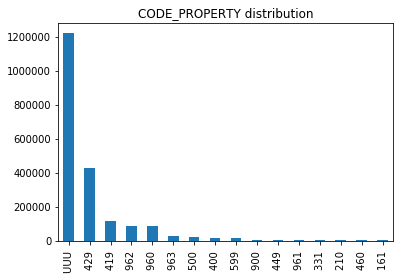

In [91]:
df4.CODE_PROPERTY.value_counts()[df4.CODE_PROPERTY.value_counts() > df4.CODE_PROPERTY.value_counts().quantile([.90]).values[0]].plot(kind='bar',
                                            title='CODE_PROPERTY distribution')

In [92]:
#Incluyo los 138 valores en un OTHERS

In [93]:
def norm_prop(df,norm):
    if df in norm:
        return 'OTHERS PROPERTIES'            
    else:
        return df

In [94]:
norm = df4.CODE_PROPERTY.value_counts()[df4.CODE_PROPERTY.value_counts() < df4.CODE_PROPERTY.value_counts().quantile([.90]).values[0]].index

In [95]:
df4['CODE_PROPERTY'] = df4.apply(lambda x: norm_prop(x['CODE_PROPERTY'],norm),axis=1)

In [96]:
prr = pd.DataFrame(df4.CODE_PROPERTY.value_counts())
prr

,CODE_PROPERTY
UUU,1220734
429,426171
419,112354
962,88568
960,83370
OTHERS PROPERTIES,43466
963,28414
500,20130
400,13189
599,12568


In [97]:
#Elimino las filas donde CODE_PROPERTY sea igual a UUU, ya que no nos aporta información

In [98]:
df4 = df4.drop(df4[df4.CODE_PROPERTY == 'UUU '].index)

In [99]:
prr = pd.DataFrame(df4.CODE_PROPERTY.value_counts())
prr

,CODE_PROPERTY
429,426171
419,112354
962,88568
960,83370
OTHERS PROPERTIES,43466
963,28414
500,20130
400,13189
599,12568
900,4678


In [100]:
#COLUMNA CODE_INCIDENT

In [101]:
#Al igual que con la columna CODE_PROPERTY, en esta columna la mayoría de registros se acumulan en unos pocos valores

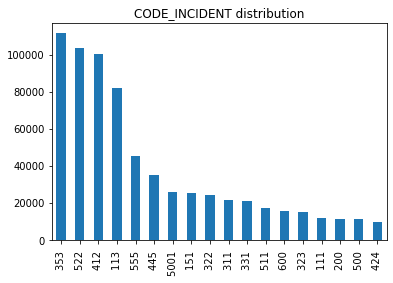

In [102]:
df4.CODE_INCIDENT.value_counts()[df4.CODE_INCIDENT.value_counts() > df4.CODE_INCIDENT.value_counts().quantile([.90]).values[0]].plot(kind='bar',
                                            title='CODE_INCIDENT distribution')

In [103]:
#df4.CODE_INCIDENT.value_counts().describe()

In [104]:
df4.CODE_INCIDENT.value_counts().quantile([.1, .25, .5, .75])

0.10       7.0
0.25      36.0
0.50     176.0
0.75    1488.0
Name: CODE_INCIDENT, dtype: float64

In [105]:
df4.CODE_INCIDENT.value_counts()[df4.CODE_INCIDENT.value_counts() > df4.CODE_INCIDENT.value_counts().quantile([.8]).values[0]].sum()/len(df4)

0.9354380359746978

In [106]:
len(df4.CODE_INCIDENT.value_counts()[df4.CODE_INCIDENT.value_counts() > df4.CODE_INCIDENT.value_counts().quantile([.8]).values[0]])

36

In [107]:
#Incluyo el resto de valores en un OTHERS

In [108]:
inc = df4.CODE_INCIDENT.value_counts()[df4.CODE_INCIDENT.value_counts() < df4.CODE_INCIDENT.value_counts().quantile([.80]).values[0]].index

In [109]:
def norm_inc(df,inc):
    if df in inc:
        return 'OTHERS INCIDENTS'            
    else:
        return df

In [110]:
df4['CODE_INCIDENT'] = df4.apply(lambda x: norm_inc(x['CODE_INCIDENT'],inc),axis=1)

In [111]:
prpr = pd.DataFrame(df4.CODE_INCIDENT.value_counts())
prpr

,CODE_INCIDENT
353,111509
522,103429
412,100593
113,82283
OTHERS INCIDENTS,51758
555,45639
445,35079
5001,25902
151,25317
322,24339


### VARIABLE OBJETIVO

In [112]:
df4['TOTAL_INCIDENT_DURATION'].describe()

count    855101.000000
mean         24.618280
std          63.720123
min           0.000000
25%          13.266667
50%          18.050000
75%          25.433333
max       14164.033333
Name: TOTAL_INCIDENT_DURATION, dtype: float64

In [113]:
df4.TOTAL_INCIDENT_DURATION.value_counts().quantile([.1, .25, .5, .75])

0.10     1.0
0.25     1.0
0.50     3.0
0.75    24.0
Name: TOTAL_INCIDENT_DURATION, dtype: float64

In [114]:
len(df4['TOTAL_INCIDENT_DURATION'])

855101

In [115]:
pr1 = pd.DataFrame(df4.TOTAL_INCIDENT_DURATION.value_counts())
pr1

,TOTAL_INCIDENT_DURATION
16.150000,833
15.216667,832
15.833333,826
14.650000,825
14.283333,823
...,...
485.716667,1
812.683333,1
190.750000,1
158.283333,1


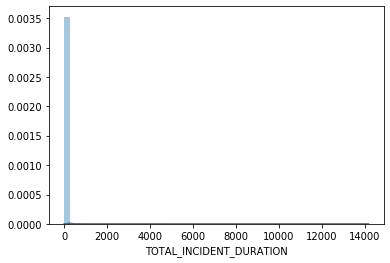

In [116]:
sns.distplot(df4['TOTAL_INCIDENT_DURATION'])

### OUTLIERS

#### Para reconocer cuales son los outliers he usado una función que he encontrado en esta url:
https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

In [118]:
anomalias = []

def find_anomalies(datos):
    datos_std = std(datos)
    datos_mean = mean(datos)
    anomaly_cut_off = datos_std * 3
    
    lim_inf = datos_mean - anomaly_cut_off
    lim_sup = datos_mean + anomaly_cut_off
    print(lim_inf)
    for outlier in datos:
        if outlier > lim_sup or outlier < lim_inf:
            anomalias.append(outlier)
    return anomalias

find_anomalies(df4.TOTAL_INCIDENT_DURATION)

-166.5419768937046


[306.8,
 251.65,
 395.15,
 1342.3333333333333,
 274.48333333333335,
 490.53333333333336,
 236.06666666666663,
 644.3833333333333,
 331.2,
 888.3166666666667,
 233.1,
 1755.2666666666669,
 11189.2,
 250.21666666666667,
 337.9166666666667,
 217.61666666666667,
 640.6666666666666,
 274.28333333333336,
 437.26666666666665,
 258.75,
 302.98333333333335,
 237.56666666666663,
 638.8166666666667,
 246.05,
 986.0666666666667,
 14164.033333333333,
 959.4,
 273.2,
 1131.1,
 2143.366666666667,
 487.66666666666674,
 668.7833333333333,
 218.58333333333331,
 233.95,
 358.61666666666673,
 390.53333333333336,
 245.25,
 330.45,
 644.8666666666667,
 11516.55,
 310.9,
 228.96666666666667,
 230.03333333333333,
 2954.116666666667,
 255.83333333333331,
 408.28333333333336,
 681.55,
 301.3333333333333,
 616.5,
 260.1,
 315.78333333333336,
 591.05,
 263.75,
 347.4,
 254.95,
 225.7333333333333,
 446.45,
 585.3833333333333,
 312.75,
 437.73333333333335,
 426.7,
 1599.966666666667,
 331.9,
 1378.5,
 675.65,
 338.

#### Decido tomar como outlier todo lo que este por encima de 200 minutos (3 horas y media aprox.)

In [119]:
df4 = df4.drop(df4[(df4['TOTAL_INCIDENT_DURATION']>200)].index)

In [120]:
len(df4.TOTAL_INCIDENT_DURATION)

851975

In [121]:
df4.TOTAL_INCIDENT_DURATION.value_counts

<bound method IndexOpsMixin.value_counts of 4          37.650000
6          26.633333
7           7.300000
8          18.866667
9          11.750000
             ...    
2075826    10.683333
2075827    28.966667
2075828    19.016667
2075831    25.133333
2075834    27.466667
Name: TOTAL_INCIDENT_DURATION, Length: 851975, dtype: float64>

In [122]:
prprpr = pd.DataFrame(df4.TOTAL_INCIDENT_DURATION.value_counts())
prprpr

,TOTAL_INCIDENT_DURATION
16.150000,833
15.216667,832
15.833333,826
14.650000,825
14.283333,823
...,...
197.883333,1
153.133333,1
154.866667,1
144.400000,1


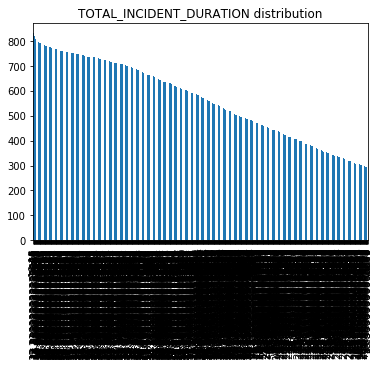

In [123]:
df4.TOTAL_INCIDENT_DURATION.value_counts()[df4.TOTAL_INCIDENT_DURATION.value_counts() > df4.TOTAL_INCIDENT_DURATION.value_counts().quantile([.90]).values[0]].plot(kind='bar',
                                            title = 'TOTAL_INCIDENT_DURATION distribution')

### Matriz de correlación

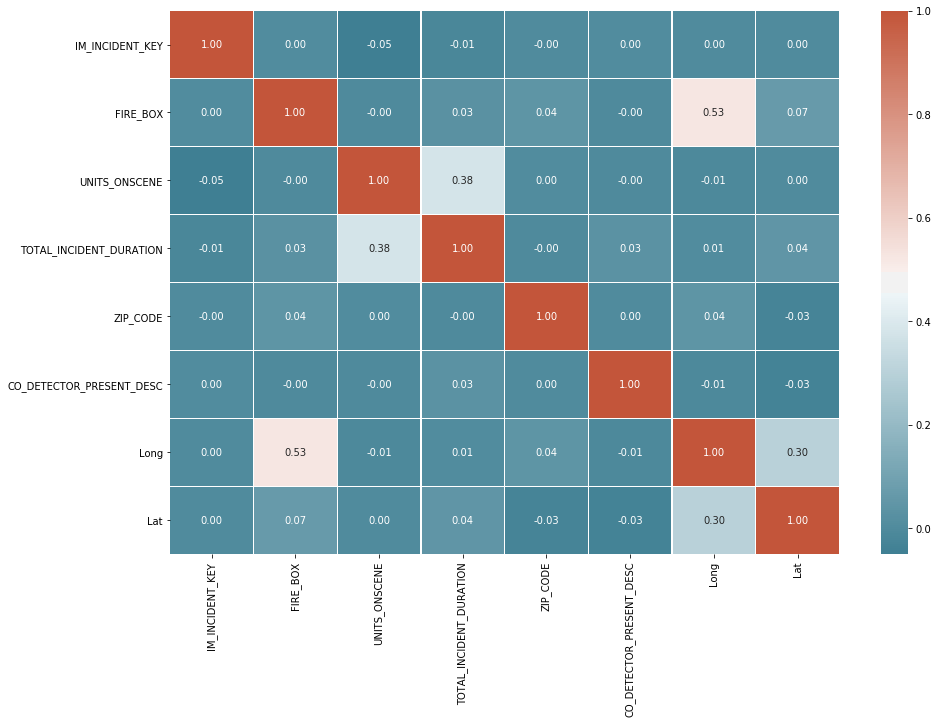

In [124]:
corr_matrix = df4.corr()
f, ax = plt.subplots(figsize = (15,10))
colormap = sns.diverging_palette(220,20, as_cmap=True)
sns.heatmap(corr_matrix, cmap = colormap, annot=True, fmt ='.2f', linewidths=0.3)
plt.show()

### DUMMIES

In [125]:
df4.columns

Index(['INCIDENT_DATE_TIME', 'IM_INCIDENT_KEY', 'FIRE_BOX',
       'INCIDENT_TYPE_DESC', 'ARRIVAL_DATE_TIME', 'UNITS_ONSCENE',
       'LAST_UNIT_CLEARED_DATE_TIME', 'HIGHEST_LEVEL_DESC',
       'TOTAL_INCIDENT_DURATION', 'ACTION_TAKEN1_DESC', 'PROPERTY_USE_DESC',
       'ZIP_CODE', 'BOROUGH_DESC', 'CO_DETECTOR_PRESENT_DESC', 'FIRE_BOXX',
       'Long', 'Lat', 'Adress', 'CODE_PROPERTY', 'PROPERTY_TYPE',
       'CODE_INCIDENT', 'INCIDENT_TYPE'],
      dtype='object')

In [126]:
df = df4.loc[:, ['UNITS_ONSCENE', 'TOTAL_INCIDENT_DURATION', 'CO_DETECTOR_PRESENT_DESC', 'BOROUGH_DESC', 'CODE_PROPERTY', 'CODE_INCIDENT']]

In [127]:
var_cat = ['CODE_PROPERTY','CODE_INCIDENT','BOROUGH_DESC']

In [128]:
df = pd.get_dummies(df, columns = var_cat)

In [129]:
df.columns

Index(['UNITS_ONSCENE', 'TOTAL_INCIDENT_DURATION', 'CO_DETECTOR_PRESENT_DESC',
       'CODE_PROPERTY_161 ', 'CODE_PROPERTY_210 ', 'CODE_PROPERTY_331 ',
       'CODE_PROPERTY_400 ', 'CODE_PROPERTY_419 ', 'CODE_PROPERTY_429 ',
       'CODE_PROPERTY_449 ', 'CODE_PROPERTY_460 ', 'CODE_PROPERTY_500 ',
       'CODE_PROPERTY_599 ', 'CODE_PROPERTY_900 ', 'CODE_PROPERTY_960 ',
       'CODE_PROPERTY_961 ', 'CODE_PROPERTY_962 ', 'CODE_PROPERTY_963 ',
       'CODE_PROPERTY_OTHERS PROPERTIES', 'CODE_INCIDENT_100 ',
       'CODE_INCIDENT_111 ', 'CODE_INCIDENT_112 ', 'CODE_INCIDENT_113 ',
       'CODE_INCIDENT_116 ', 'CODE_INCIDENT_118 ', 'CODE_INCIDENT_131 ',
       'CODE_INCIDENT_142 ', 'CODE_INCIDENT_151 ', 'CODE_INCIDENT_200 ',
       'CODE_INCIDENT_311 ', 'CODE_INCIDENT_322 ', 'CODE_INCIDENT_323 ',
       'CODE_INCIDENT_331 ', 'CODE_INCIDENT_353 ', 'CODE_INCIDENT_400 ',
       'CODE_INCIDENT_4001 ', 'CODE_INCIDENT_411 ', 'CODE_INCIDENT_412 ',
       'CODE_INCIDENT_424 ', 'CODE_INCIDENT_444 ', 'C

### Separo los datos en Train y Test

In [130]:
datos_reserva = df.sample(frac = 0.05,random_state=42)
print('Datos reservados: %0.0f' %(len(datos_reserva)))

Datos reservados: 42599


In [131]:
df_resto = df.drop(datos_reserva.index, axis = 0)
print('Total de datos antes de train y test: %0.0f' %len(df_resto))

Total de datos antes de train y test: 809376


In [132]:
X = df_resto.loc[:, df_resto.columns != 'TOTAL_INCIDENT_DURATION']
y = df_resto['TOTAL_INCIDENT_DURATION']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Mean Model

In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [138]:
pred_mean = y_train.mean()

In [139]:
dfr = pd.DataFrame()
dfr['y_real'] = y_train
dfr['y_pred1'] = pred_mean

In [140]:
pred_chunk = dfr['y_pred1'][:y_test.shape[0]]

In [141]:
pred_chunk.shape, y_test.shape

((242813,), (242813,))

#### Mean Absolute Error para el Mean Model

In [142]:
mae_mean = mean_absolute_error(y_test,pred_chunk)
print('Mean model: MAE = %.5f' %mae_mean)

Mean model: MAE = 11.08258


#### Mean Squared Error para el Mean Model

In [143]:
rmse_mean = np.sqrt(mean_squared_error(y_test,pred_chunk))
print('Mean model: RMSE = %.5f' %rmse_mean)

Mean model: RMSE = 19.06799


### Regresión Lineal

In [144]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
y_pred_reg = reg.predict(X_test)

#### Métricas

In [146]:
mae_reg = mean_absolute_error(y_test, y_pred_reg)
print('Regresión Lineal: MAE = %.5f' %mae_reg)

Regresión Lineal: MAE = 9.77369


In [147]:
rmse_reg = np.sqrt(mean_squared_error(y_test,y_pred_reg)) 
print('Regresión Lineal: RMSE = %.5f' %rmse_reg)  

Regresión Lineal: RMSE = 16.10887


In [148]:
r2_reg = r2_score(y_test, y_pred_reg)
print('Regresión Lineal: R2 = %.5f' %r2_reg)

Regresión Lineal: R2 = 0.28628


In [149]:
metricas = {'Métricas': ['MAE', 'RMSE', 'R2'], 
           'Regresión Lineal': [mae_reg, rmse_reg,r2_reg]}
df_metricas = pd.DataFrame(data = metricas)
df_metricas

,Métricas,Regresión Lineal
0,MAE,9.773695
1,RMSE,16.108870
2,R2,0.286280


In [150]:
#plt.hist(y_test-y_pred_reg,bins=50);

### KNN

In [151]:
from sklearn.neighbors import KNeighborsRegressor


In [152]:
#from sklearn.model_selection import GridSearchCV
#param_grid = {'n_neighbors':np.arange(1,20)}

#mod = GridSearchCV(KNeighborsRegressor(), param_grid, cv=2, n_jobs=1)
#mod.fit(X_train, y_train)
#mod.best_params_

#### He intentado ejecutar el código de la celda de arriba para encontrar el parámetro K óptimo. Tras días ejecutandose y cambiando los parámetros no he conseguido obtener el output. Así que he decidido coger k=7  para este modelo.

In [153]:
regk = KNeighborsRegressor(n_neighbors=7)
regk.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [154]:
y_pred_regk = regk.predict(X_test)

#### Métricas

In [155]:
mae_regk = mean_absolute_error(y_test, y_pred_regk)
print('KNN: MAE = %.5f' %mae_regk)

KNN: MAE = 10.22596


In [156]:
rmse_regk = np.sqrt(mean_squared_error(y_test,y_pred_regk)) 
print('KNN: RMSE = %.5f' %rmse_regk)

KNN: RMSE = 16.47733


In [157]:
r2_regk = r2_score(y_test, y_pred_regk)
print('KNN: R2 = %.5f' %r2_regk)

KNN: R2 = 0.25326


In [158]:
metricask = {'Métricas': ['MAE', 'RMSE', 'R2'], 
           'KNN': [mae_regk, rmse_regk,r2_regk]}
df_metricask = pd.DataFrame(data = metricask)
df_metricask

,Métricas,KNN
0,MAE,10.225962
1,RMSE,16.477331
2,R2,0.253257


### RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
#clf = GridSearchCV(RandomForestRegressor(random_state=42),
                  #param_grid={"max_depth":np.arange(2,10),
                             #'min_samples_leaf' : (2,4),
                             #'n_estimators': (50, 100, 200, 500, 1000)},
                  #cv=5)

#clf.fit(X_train,y_train)
#clf.best_estimator_

#### Al igual que ha pasado con KNN no he conseguido obtener los parámetros óptimos para este modelo ejecutando el código de la celda de arriba.

In [163]:
regrf = RandomForestRegressor(max_depth = 4)

regrf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [164]:
y_pred_rf = regrf.predict(X_test)

#### Métricas

In [165]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Random Forest: MAE = %.5f' %mae_rf)

Random Forest: MAE = 9.80831


In [166]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf)) 
print('Random Forest: RMSE = %.5f' %rmse_rf)

Random Forest: RMSE = 16.11901


In [167]:
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest: R2 = %.5f' %r2_rf)

Random Forest: R2 = 0.28538


In [168]:
metricasrf = {'Métricas': ['MAE', 'RMSE', 'R2'], 
           'RF': [mae_rf, rmse_rf,r2_rf]}
df_metricasrf = pd.DataFrame(data = metricasrf)
df_metricasrf

,Métricas,RF
0,MAE,9.808306
1,RMSE,16.119014
2,R2,0.285381
